##**Utils**

In [ ]:
def cross_validation (X,y):
  resultsDecisionTreeClassifier = []
  resultsRandonForestClassifier = []
  resultslogisticRegression = []
  resultsNaviBayes = []
  resultsSvm = []
  for i in range(30):
      kfold = KFold(n_splits=10, shuffle=True, random_state=i)

      tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, splitter='best')
      scoresTree = cross_val_score(tree, X, y.argmax(axis=1), cv=kfold)
      resultsDecisionTreeClassifier.append(scoresTree.mean())

      randonForest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
      scoresRandonForest = cross_val_score(randonForest, X, y.argmax(axis=1), cv=kfold)
      resultsRandonForestClassifier.append(scoresRandonForest.mean())

      logisticRegression = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
      scoresLogisticRegression = cross_val_score(logisticRegression, X, y.argmax(axis=1), cv=kfold)
      resultslogisticRegression.append(scoresLogisticRegression.mean())

      naviBayes = GaussianNB()
      scoresNaviBayes = cross_val_score(naviBayes, X, y.argmax(axis=1), cv=kfold)
      resultsNaviBayes.append(scoresNaviBayes.mean())

  #Create a dataframe with results
  results = pd.DataFrame({'DecisionTree': resultsDecisionTreeClassifier, 'RandonForest': resultsRandonForestClassifier, 'Logistic_Regression': resultslogisticRegression,
                              'Navi Bayes': resultsNaviBayes})
  
  return results.describe()

##**importing the libraries**

In [ ]:
import pandas as pd
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score, KFold, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

##**Treating a third_df_finland base**

In [ ]:
third_df_finlandia = pd.read_csv("https://raw.githubusercontent.com/SGT-RIBEIRO/datasets/main/dataset_finlandia/test-oura-data-F-with-cycle-phases-08-febru-2023.csv")

In [ ]:
third_df_finlandia.head(5)

,date,cycle phases,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timin Score,...,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
0,07/12/2022,LP,83.0,86.0,70.0,100.0,76.0,85.0,75.0,83.0,...,2,88.0,74,100.0,96.0,97.0,88.0,72.0,79.0,100.0
1,08/12/2022,LP,84.0,89.0,93.0,100.0,76.0,77.0,72.0,67.0,...,1,86.0,77,100.0,93.0,97.0,78.0,64.0,70.0,100.0
2,10/12/2022,LP,82.0,78.0,68.0,98.0,88.0,88.0,78.0,83.0,...,0,68.0,73,94.0,90.0,98.0,67.0,48.0,72.0,68.0
3,11/12/2022,LP,83.0,74.0,79.0,100.0,99.0,91.0,78.0,82.0,...,1,81.0,75,88.0,86.0,97.0,76.0,74.0,84.0,53.0
4,12/12/2022,LP,80.0,82.0,59.0,100.0,65.0,75.0,97.0,77.0,...,0,87.0,68,87.0,95.0,98.0,75.0,82.0,88.0,100.0


In [ ]:
third_df_finlandia.drop(['date','Bedtime Start','Bedtime End'], axis=1, inplace=True)

In [ ]:
third_df_finlandia = third_df_finlandia.iloc[0:60,:]

In [ ]:
#replacing the "Nones" values with 0

for name, value in third_df_finlandia.iteritems():
  for x,i in enumerate(third_df_finlandia[name]):
    if third_df_finlandia[name][x] == 'None':
      third_df_finlandia[name][x] = 0

In [ ]:
third_df_finlandia = third_df_finlandia.dropna(axis=0)

In [ ]:
third_df_finlandia['Previous Night Score'] = third_df_finlandia['Previous Night Score'].astype('int')

In [ ]:
third_df_finlandia.rename(columns={'cycle phases': 'Cycle Phase'}, inplace = True)

In [ ]:
third_df_finlandia_X = third_df_finlandia.iloc[:,1:52]
third_df_finlandia_y = third_df_finlandia.iloc[:,0]

third_df_finlandia = pd.concat([third_df_finlandia_X,third_df_finlandia_y], axis=1)

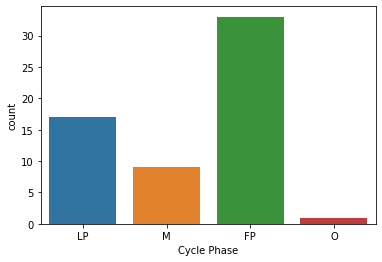

In [ ]:
#visualization of the quantity of each target

sns.countplot(x=third_df_finlandia['Cycle Phase']);

In [ ]:
np.unique(third_df_finlandia['Cycle Phase'], return_counts=True)

(array(['FP', 'LP', 'M', 'O'], dtype=object), array([33, 17,  9,  1]))

##**Cross-validation with the original data**

In [ ]:
X_original_data = third_df_finlandia.iloc[:,0:51]
y_original_data = third_df_finlandia.iloc[:,51]
y_original_data = pd.get_dummies(y_original_data, y_original_data).values

In [ ]:
original_base_result_statistics = cross_validation(X_original_data, y_original_data)

In [ ]:
original_base_result_statistics

,DecisionTree,RandonForest,Logistic_Regression,Navi Bayes
count,30.000000,30.000000,30.000000,30.000000
mean,0.690000,0.765000,0.503333,0.661111
std,0.042345,0.032267,0.047424,0.024500
min,0.616667,0.683333,0.433333,0.616667
25%,0.666667,0.737500,0.466667,0.637500
50%,0.700000,0.775000,0.491667,0.666667
75%,0.716667,0.783333,0.533333,0.683333
max,0.766667,0.816667,0.583333,0.716667


##**cross-validation by resampling class "O"**

In [ ]:
X_with_class_O_resampling = third_df_finlandia.iloc[:,0:51]
y_with_class_O_resampling = third_df_finlandia.iloc[:,51]

In [ ]:
#Balanced the "O" class with RandomOverSampler

sampling_strategy = {"O": 5}

randon_over_sampler = RandomOverSampler(random_state=42, sampling_strategy=sampling_strategy)

# Balances the "O" class with the rest of the classes in the dataset
X_with_class_O_resampling, y_with_class_O_resampling = randon_over_sampler.fit_resample(X_with_class_O_resampling, y_with_class_O_resampling)

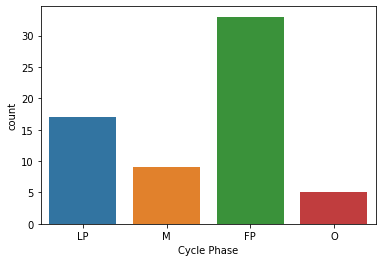

In [ ]:
#visualization of the quantity of each target

sns.countplot(x=y_with_class_O_resampling);

In [ ]:
np.unique(y_with_class_O_resampling, return_counts=True)

(array(['FP', 'LP', 'M', 'O'], dtype=object), array([33, 17,  9,  5]))

In [ ]:
X_with_class_O_resampling = X_with_class_O_resampling
y_with_class_O_resampling = pd.get_dummies(y_with_class_O_resampling).values

In [ ]:
class_O_resampling_result_statistics = cross_validation(X_with_class_O_resampling, y_with_class_O_resampling)

In [ ]:
class_O_resampling_result_statistics

,DecisionTree,RandonForest,Logistic_Regression,Navi Bayes
count,30.000000,30.000000,30.000000,30.000000
mean,0.707381,0.796508,0.542540,0.703413
std,0.039065,0.022175,0.038851,0.027891
min,0.621429,0.750000,0.461905,0.645238
25%,0.686310,0.777976,0.513690,0.683929
50%,0.705952,0.798810,0.544048,0.703571
75%,0.733333,0.813690,0.565476,0.719048
max,0.778571,0.833333,0.607143,0.773810


##Start test of the RFE Method with automatic feature selection through cross-validation

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 30  
randonForest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cv = StratifiedKFold(10)

rfecv = RFECV(
    estimator=randonForest,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_with_class_O_resampling, y_with_class_O_resampling.argmax(axis=1))

print(f"Optimal number of features: {rfecv.n_features_}")

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Optimal number of features: 40


In [ ]:
rfecv.cv_results_

{'mean_test_score': array([0.76904762, 0.76904762, 0.76904762, 0.78333333, 0.76904762,
        0.8       , 0.8       , 0.76904762, 0.78571429, 0.77142857,
        0.81904762, 0.74047619, 0.74047619, 0.7547619 , 0.76904762,
        0.75714286, 0.72619048, 0.7547619 , 0.76666667, 0.78333333,
        0.79761905, 0.7547619 ]),
 'std_test_score': array([0.15358527, 0.13966676, 0.13966676, 0.14063752, 0.15358527,
        0.13560982, 0.13560982, 0.13966676, 0.15540161, 0.15474359,
        0.14372751, 0.14771502, 0.14771502, 0.15135443, 0.15358527,
        0.14784928, 0.15622024, 0.15135443, 0.16176465, 0.14063752,
        0.14015298, 0.15135443]),
 'split0_test_score': array([0.57142857, 0.71428571, 0.71428571, 0.71428571, 0.57142857,
        0.71428571, 0.71428571, 0.71428571, 0.71428571, 0.71428571,
        0.71428571, 0.71428571, 0.57142857, 0.57142857, 0.57142857,
        0.57142857, 0.57142857, 0.57142857, 0.71428571, 0.71428571,
        0.85714286, 0.57142857]),
 'split1_test_score': ar

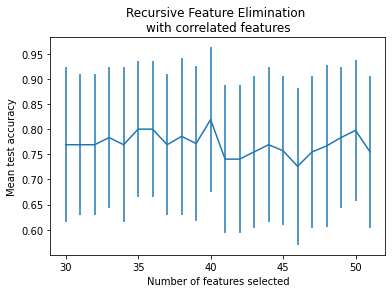

In [ ]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [ ]:
#selecting indices of selected and discarded features
features_selected_index = []
features_discarted_index = []
for x in range(len(rfecv.support_)):
  if rfecv.support_[x] == True:
    features_selected_index.append(x)
  else:
    features_discarted_index.append(x)

In [ ]:
features_selected = X_with_class_O_resampling.iloc[:,features_selected_index]
features_discarted = X_with_class_O_resampling.iloc[:,features_discarted_index]

In [ ]:
features_selected.columns

Index(['Sleep Score', 'Total Sleep Score', 'REM Sleep Score',
       'Restfulness Score', 'Sleep Latency Score', 'Total Sleep Duration',
       'Total Bedtime ', 'Awake Time', 'REM Sleep Duration',
       'Light Sleep Duration', 'Deep Sleep Duration', 'Restless Sleep',
       'Sleep Latency', 'Sleep Timing', 'Average Resting Heart Rate',
       'Lowest Resting Heart Rate', 'Average HRV',
       'Temperature Deviation (°C)', 'Temperature Trend Deviation',
       'Respiratory Rate', 'Activity Score', 'Meet Daily Targets Score',
       'Training Frequency Score', 'Training Volume Score', 'Activity Burn',
       'Total Burn', 'Steps', 'Rest Time', 'Low Activity Time',
       'Medium Activity Time', 'High Activity Time', 'Non-wear Time',
       'Readiness Score', 'Previous Night Score', 'Sleep Balance Score',
       'Previous Day Activity Score', 'Activity Balance Score',
       'Temperature Score', 'Resting Heart Rate Score', 'HRV Balance Score'],
      dtype='object')

In [ ]:
features_discarted.columns

Index(['Deep Sleep Score', 'Sleep Efficiency Score', 'Sleep Timin Score',
       'Sleep Efficiency', 'Stay Active Score', 'Move Every Hour Score',
       'Equivalent Walking Distance', 'Inactive Time', 'Average MET',
       'Long Periods of Inactivity', 'Recovery Index Score'],
      dtype='object')

In [ ]:
features_selected.shape, y_with_class_O_resampling.shape

In [ ]:
class_O_resampling_and_feeatures_selected_result_statistics = cross_validation(features_selected, y_with_class_O_resampling)

In [ ]:
class_O_resampling_and_feeatures_selected_result_statistics

,DecisionTree,RandonForest,Logistic_Regression,Navi Bayes
count,30.000000,30.000000,30.000000,30.000000
mean,0.715635,0.798254,0.530159,0.746270
std,0.034297,0.025689,0.029569,0.028294
min,0.652381,0.759524,0.452381,0.700000
25%,0.691071,0.779167,0.511905,0.731548
50%,0.720238,0.792857,0.535714,0.738095
75%,0.738095,0.817857,0.551190,0.754762
max,0.780952,0.850000,0.585714,0.823810


##End test of the RFE Method with automatic feature selection through cross-validation

##Start test of the RFE Method with manual feature selection

In [ ]:
X_with_class_O_resampling.shape, y_with_class_O_resampling.shape

In [ ]:
from sklearn.feature_selection import RFE

randonForest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, n_estimators=100)

rfe = RFE(estimator=randonForest, n_features_to_select=25)

rfe.fit(X_with_class_O_resampling.values, y_with_class_O_resampling)

RFE(estimator=RandomForestClassifier(criterion='entropy'),
    n_features_to_select=25)

In [ ]:
print("Features selected:")
print(X_with_class_O_resampling.columns[rfe.support_])
print("\nDeleted features:")
print(X_with_class_O_resampling.columns[~rfe.support_])

Features selected:
Index(['Sleep Latency Score', 'Total Sleep Duration', 'Awake Time',
       'Light Sleep Duration', 'Deep Sleep Duration', 'Restless Sleep',
       'Average Resting Heart Rate', 'Lowest Resting Heart Rate',
       'Average HRV', 'Temperature Deviation (°C)',
       'Temperature Trend Deviation', 'Respiratory Rate', 'Activity Score',
       'Meet Daily Targets Score', 'Training Frequency Score',
       'Training Volume Score', 'Low Activity Time', 'High Activity Time',
       'Readiness Score', 'Previous Night Score', 'Sleep Balance Score',
       'Activity Balance Score', 'Temperature Score',
       'Resting Heart Rate Score', 'HRV Balance Score'],
      dtype='object')

Deleted features:
Index(['Sleep Score', 'Total Sleep Score', 'REM Sleep Score',
       'Deep Sleep Score', 'Sleep Efficiency Score', 'Restfulness Score',
       'Sleep Timin Score', 'Total Bedtime ', 'REM Sleep Duration',
       'Sleep Efficiency', 'Sleep Latency', 'Sleep Timing',
       'Stay Active 

In [ ]:
X_with_class_O_resampling = X_with_class_O_resampling.drop(['Sleep Score', 'Total Sleep Score', 'REM Sleep Score',
       'Deep Sleep Score', 'Sleep Efficiency Score', 'Restfulness Score',
       'Sleep Timin Score', 'Total Bedtime ', 'REM Sleep Duration',
       'Sleep Efficiency', 'Sleep Latency', 'Sleep Timing',
       'Stay Active Score', 'Move Every Hour Score', 'Activity Burn',
       'Total Burn', 'Steps', 'Equivalent Walking Distance', 'Inactive Time',
       'Rest Time', 'Medium Activity Time', 'Non-wear Time', 'Average MET',
       'Long Periods of Inactivity', 'Previous Day Activity Score',
       'Recovery Index Score'], axis=1)

In [ ]:
X_with_class_O_resampling.shape

(64, 25)

In [ ]:
class_O_resampling_and_features_selected_manual_result_statistics = cross_validation(X_with_class_O_resampling, y_with_class_O_resampling)

In [ ]:
class_O_resampling_and_features_selected_manual_result_statistics

,DecisionTree,RandonForest,Logistic_Regression,Navi Bayes
count,30.000000,30.000000,30.000000,30.000000
mean,0.724683,0.813254,0.512698,0.831111
std,0.038840,0.027360,0.031259,0.019493
min,0.623810,0.745238,0.445238,0.773810
25%,0.697024,0.794048,0.492857,0.828571
50%,0.733333,0.819048,0.515476,0.838095
75%,0.748810,0.828571,0.530357,0.842857
max,0.795238,0.864286,0.580952,0.859524


##End test of the RFE Method with manual feature selection

In [ ]:
# train and test

X_third_df_finlandia_train, X_third_df_finlandia_test, y_third_df_finlandia_train, y_third_df_finlandia_test = train_test_split(X_with_class_O_resampling.values, y_with_class_O_resampling, test_size=0.2, random_state=42)

In [ ]:
X_third_df_finlandia_train.shape, y_third_df_finlandia_train.shape, X_third_df_finlandia_test.shape, y_third_df_finlandia_test.shape

((51, 25), (51, 4), (13, 25), (13, 4))

In [ ]:
randonForest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, n_estimators=100)

randonForest.fit(X_third_df_finlandia_train, y_third_df_finlandia_train)

predicitionsRF = randonForest.predict(X_third_df_finlandia_test)

accuracy_score(y_third_df_finlandia_test.argmax(axis=1), predicitionsRF.argmax(axis=1))

0.8461538461538461

In [ ]:
predicitionsRF.argmax(axis=1)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 2])

In [ ]:
y_third_df_finlandia_test.argmax(axis=1)

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 2, 2])

In [ ]:
print(classification_report(y_third_df_finlandia_test.argmax(axis=1), predicitionsRF.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.67      0.80         3
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1

    accuracy                           0.85        13
   macro avg       0.94      0.79      0.84        13
weighted avg       0.88      0.85      0.84        13

